In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

df = pd.read_csv("poker-matches-dataset.csv")
data = pd.read_csv('games.csv')
data_2 = pd.read_csv('games_2.csv')


X = data[['Score']]
y = data['Resultado']

X_2 = data_2[['Score', 'Apostadores', 'Desistentes']]
y_2 = data_2['Resultado']

X_3 = df.drop(columns=['Continuar'])  
y_3 = df['Continuar']      

k = 5

datasets = [
    (X, y),
    (X_2, y_2),
    (X_3, y_3)
]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

results = []
feature_importances = []

for i, (X, y) in enumerate(datasets):
    print(f"\nTreinando no Dataset {i + 1}")
    scores = cross_val_score(rf_model, X, y, cv=k, scoring='accuracy')
    results.append(scores)

    rf_model.fit(X, y)
    feature_importances.append(rf_model.feature_importances_)

    print(f"Acurácias: {scores}")
    print(f"Média da Acurácia: {np.mean(scores):.4f}")




Treinando no Dataset 1
Acurácias: [0.5 0.6 0.7 0.5 0.9]
Média da Acurácia: 0.6400

Treinando no Dataset 2
Acurácias: [0.8 0.8 0.7 0.7 0.6]
Média da Acurácia: 0.7200

Treinando no Dataset 3
Acurácias: [0.64285714 0.88095238 0.95238095 0.92857143 0.90243902]
Média da Acurácia: 0.8614


In [6]:
from scipy.stats import friedmanchisquare

# Executar o Teste de Friedman para comparar as acurácias
friedman_stat, friedman_p = friedmanchisquare(*results)
print("\nTeste de Friedman:")
print("Estatística:", friedman_stat)
print("p-valor:", friedman_p)

if friedman_p < 0.05:
    print("Há diferenças estatisticamente significativas entre os datasets.")
else:
    print("Não há diferenças estatisticamente significativas entre os datasets.")



Teste de Friedman:
Estatística: 6.0000000000000036
p-valor: 0.04978706836786384
Há diferenças estatisticamente significativas entre os datasets.


Estatística de Friedman: 6.0000000000000036, valor p: 0.04978706836786384
Rankings médios: [1.2 2.  2.8]
Resultados do teste de Nemenyi:
          0         1         2
0  1.000000  0.609411  0.046560
1  0.609411  1.000000  0.328971
2  0.046560  0.328971  1.000000


c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


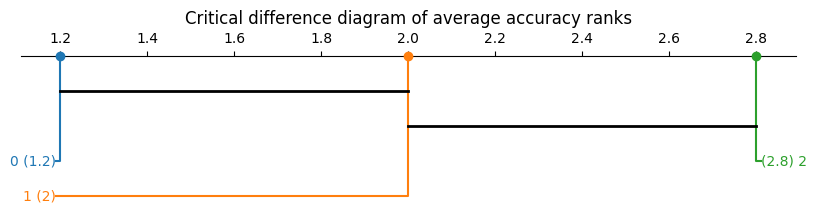

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, rankdata
import scikit_posthocs as sp

scores = np.array(results).T  

stat, p_value = friedmanchisquare(*scores.T)
print(f"Estatística de Friedman: {stat}, valor p: {p_value}")

mean_ranks = np.mean(scores.argsort(axis=1), axis=0) + 1
print(f"Rankings médios: {mean_ranks}")

result = sp.posthoc_nemenyi_friedman(scores)
print("Resultados do teste de Nemenyi:")
print(result)

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average accuracy ranks')
sp.critical_difference_diagram(mean_ranks, result)
plt.show()


In [8]:

'''print("\nBase 1")
print(f'\nAcurácias por fold: {k_fold}')
print(f'Acurácia média: {k_fold.mean():.2f}')
print("\nBase 2")
print(f'\nAcurácias por fold: {k_fold_2}')
print(f'Acurácia média: {k_fold_2.mean():.2f}')
print("\nBase 3")
print(f'\nAcurácias por fold: {k_fold_3}')
print(f'Acurácia média: {k_fold_3.mean():.2f}')'''

'print("\nBase 1")\nprint(f\'\nAcurácias por fold: {k_fold}\')\nprint(f\'Acurácia média: {k_fold.mean():.2f}\')\nprint("\nBase 2")\nprint(f\'\nAcurácias por fold: {k_fold_2}\')\nprint(f\'Acurácia média: {k_fold_2.mean():.2f}\')\nprint("\nBase 3")\nprint(f\'\nAcurácias por fold: {k_fold_3}\')\nprint(f\'Acurácia média: {k_fold_3.mean():.2f}\')'

In [9]:
'''
print("\n========= Base 1 =========")
importances = decision_model_3.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.2f}')

print("\n========= Base 2 =========")
importances = decision_model_3.feature_importances_
for feature, importance in zip(X_2.columns, importances):
    print(f'{feature}: {importance:.2f}')

print("\n========= Base 3 =========")
importances = decision_model_3.feature_importances_
for feature, importance in zip(X_3.columns, importances):
    print(f'{feature}: {importance:.2f}')'''

'\nprint("\n========= Base 1 =========")\nimportances = decision_model_3.feature_importances_\nfor feature, importance in zip(X.columns, importances):\n    print(f\'{feature}: {importance:.2f}\')\n\nprint("\n========= Base 2 =========")\nimportances = decision_model_3.feature_importances_\nfor feature, importance in zip(X_2.columns, importances):\n    print(f\'{feature}: {importance:.2f}\')\n\nprint("\n========= Base 3 =========")\nimportances = decision_model_3.feature_importances_\nfor feature, importance in zip(X_3.columns, importances):\n    print(f\'{feature}: {importance:.2f}\')'

In [10]:
from joblib import dump

#dump(decision_model_3, "modelos/random_forest_model83%.joblib")
#print("Modelo salvo com sucesso!")